#mask binarisation

In [24]:
import cv2 
import shutil
import os
import numpy as np


In [25]:
def binarize_masks_with_images(data_folder, output_folder, threshold=0.5):
    
    
    # Ensure the output folder exists
    os.makedirs(output_folder, exist_ok=True)

    # Walk through each patient folder
    for patient_folder in sorted(os.listdir(data_folder)):
        patient_path = os.path.join(data_folder, patient_folder)

        if os.path.isdir(patient_path):  # Ensure it's a directory
            images_path = os.path.join(patient_path, "images")
            masks_path = os.path.join(patient_path, "masks")
            if not os.path.exists(images_path) or not os.path.exists(masks_path):
                print(f"Missing images or masks folder for {patient_folder}. Skipping.")
                continue

            # Create patient output folder
            patient_output_path = os.path.join(output_folder, patient_folder)
            os.makedirs(patient_output_path, exist_ok=True)

            # Copy images to output folder
            output_images_path = os.path.join(patient_output_path, "images")
            os.makedirs(output_images_path, exist_ok=True)

            for image_file in sorted(os.listdir(images_path)):
                image_file_path = os.path.join(images_path, image_file)  # Full path to source
                output_image_path = os.path.join(output_images_path, image_file)  # Full path to destination

                if os.path.isfile(image_file_path):  # Ensure it's a file
                    shutil.copy(image_file_path, output_image_path)

            # Process and save binarized masks in output folder
            output_masks_path = os.path.join(patient_output_path, "masks")
            os.makedirs(output_masks_path, exist_ok=True)

            for mask_file in sorted(os.listdir(masks_path)):
                mask_file_path = os.path.join(masks_path, mask_file)  # Full path to source

                if os.path.isfile(mask_file_path):  # Ensure it's a file
                    # Load the mask
                    mask = cv2.imread(mask_file_path, cv2.IMREAD_GRAYSCALE)

                    # Normalize and binarize the mask
                    if mask.max() > 1:  # Normalize if not already in [0, 1]
                        mask = mask / 255.0
                    binary_mask = (mask > threshold).astype(np.uint8) * 255  # Convert to 0 or 255

                    # Save the binarized mask to the output folder
                    save_path = os.path.join(output_masks_path, mask_file)
                    cv2.imwrite(save_path, binary_mask)

    print(f"Processing complete. Binarized masks and images saved to {output_folder}.")
data_folder = "/Users/naomimalange/Desktop/M1/AI Lab/Ongoing projects/DCM/images_masks_separated"
output_folder = "/Users/naomimalange/Desktop/M1/AI Lab/Ongoing projects/DCM/binarized_mask"  

binarize_masks_with_images(data_folder, output_folder, threshold=0.5)

Processing complete. Binarized masks and images saved to /Users/naomimalange/Desktop/M1/AI Lab/Ongoing projects/DCM/binarized_mask.


## Masks and image overlying 

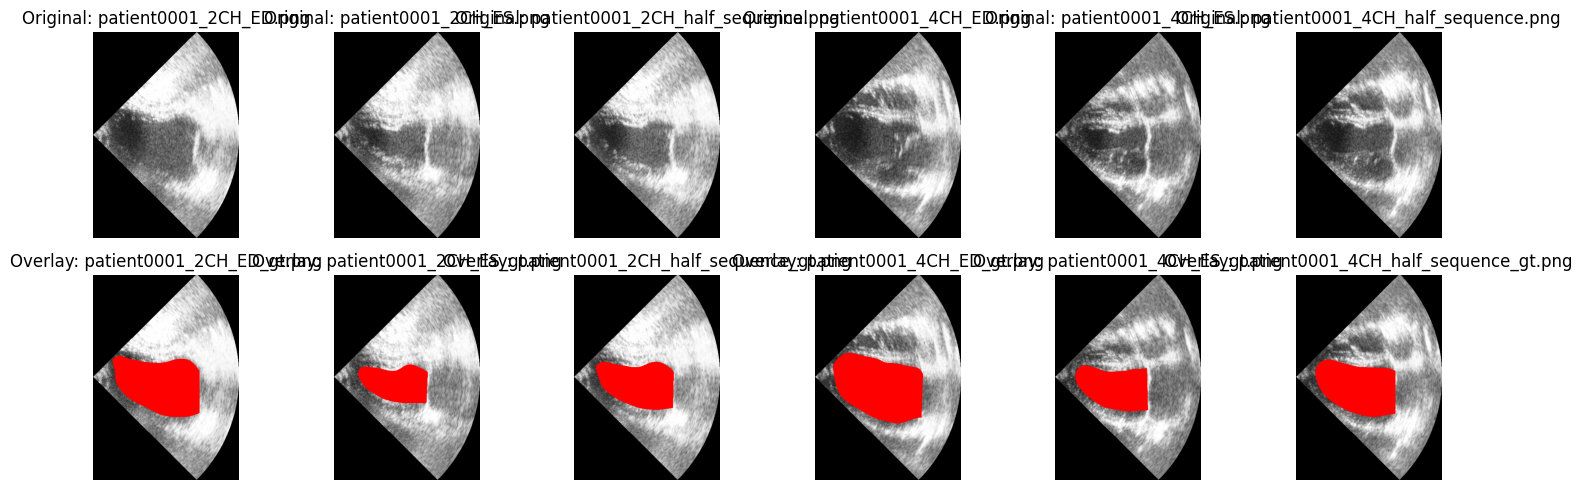

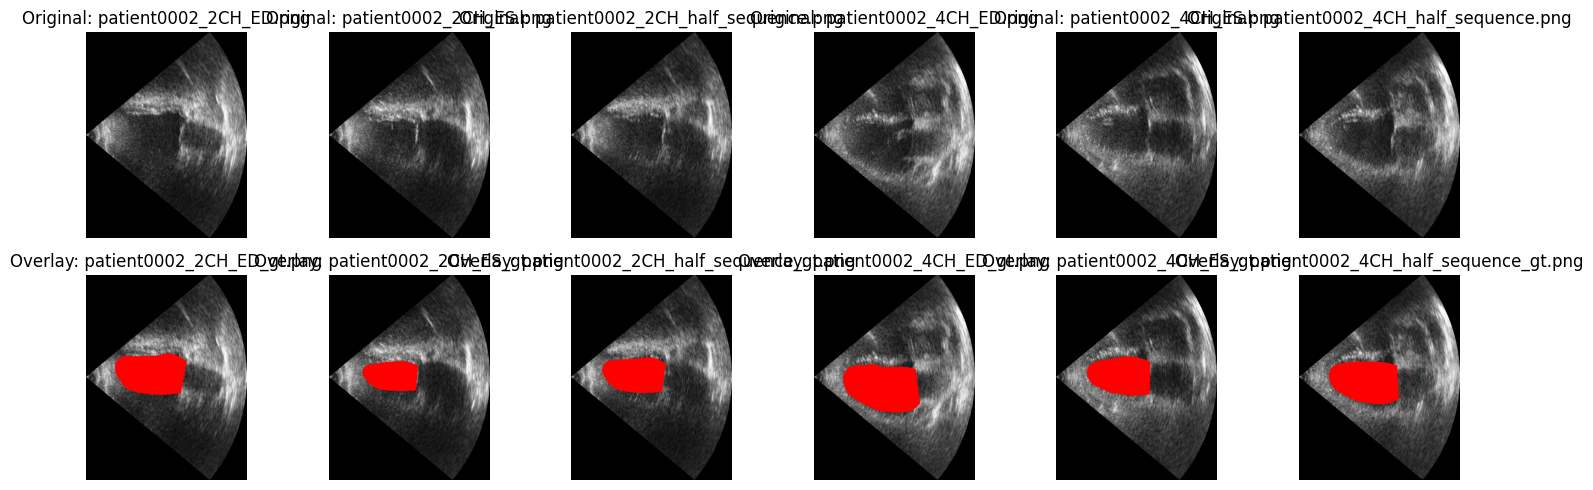

In [26]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

def visualize_labeled_masks(data_folder, num_patients=3, threshold=0.5):
    """
    Visualizes images with their corresponding binary labeled masks.

    Parameters:
    - data_folder: Path to the parent folder containing patient folders.
    - num_patients: Number of patient folders to visualize (default=3).
    - threshold: Threshold used during binarization (default=0.5).

    Returns:
    - None
    """
    # Get a sorted list of patient folders
    patient_folders = sorted(os.listdir(data_folder))[:num_patients]

    for patient_folder in patient_folders:
        patient_path = os.path.join(data_folder, patient_folder)

        if os.path.isdir(patient_path):  
            images_path = os.path.join(patient_path, "images")
            masks_path = os.path.join(patient_path, "masks")

            if not os.path.exists(images_path) or not os.path.exists(masks_path):
                print(f"Missing images or masks for {patient_folder}. Skipping.")
                continue

            
            image_files = sorted(os.listdir(images_path))
            mask_files = sorted(os.listdir(masks_path))

            plt.figure(figsize=(15, 5))

            for i, (image_file, mask_file) in enumerate(zip(image_files, mask_files)):
                
                image_path = os.path.join(images_path, image_file)
                mask_path = os.path.join(masks_path, mask_file)

                image = cv2.imread(image_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for proper visualization
                mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

                # Overlay the binary mask on the image
                overlay = image.copy()
                overlay[mask > (threshold * 255)] = [255, 0, 0]  # Apply red overlay for mask regions

                # Display the original image and overlay
                plt.subplot(2, len(image_files), i + 1)
                plt.imshow(image)
                plt.title(f"Original: {image_file}")
                plt.axis('off')

                plt.subplot(2, len(image_files), i + 1 + len(image_files))
                plt.imshow(overlay)
                plt.title(f"Overlay: {mask_file}")
                plt.axis('off')

            plt.tight_layout()
            plt.show()

# Example usage
data_folder = "/Users/naomimalange/Desktop/M1/AI Lab/Ongoing projects/DCM/binarized_mask"  
visualize_labeled_masks(data_folder, num_patients=3, threshold=0.5)


##Flattening images and masks

In [ ]:
import os
import shutil

def flatten_patient_folders(data_folder, output_images_folder, output_masks_folder):
    """
    Flattens patient folders containing images and masks into two separate directories.

    Parameters:
    - data_folder: Root folder containing patient directories with "images" and "masks".
    - output_images_folder: Target folder for all images.
    - output_masks_folder: Target folder for all masks.
    """
    os.makedirs(output_images_folder, exist_ok=True)
    os.makedirs(output_masks_folder, exist_ok=True)

    patient_count = 0
    for patient_folder in sorted(os.listdir(data_folder)):
        patient_path = os.path.join(data_folder, patient_folder)
        if os.path.isdir(patient_path):  # Ensure it's a directory
            patient_count += 1
            images_path = os.path.join(patient_path, "images")
            masks_path = os.path.join(patient_path, "masks")

            if not os.path.exists(images_path) or not os.path.exists(masks_path):
                print(f"Skipping {patient_folder} (missing images or masks)")
                continue

            # Get sorted lists of images and masks
            image_files = sorted(os.listdir(images_path))
            mask_files = sorted(os.listdir(masks_path))

            for img_file in image_files:
                # Check if the corresponding mask exists
                expected_mask_file = img_file.replace(".png", "_gt.png")
                if expected_mask_file not in mask_files:
                    print(f"Mismatch: {img_file} and {expected_mask_file} in {patient_folder}")
                    continue

                # Copy image and mask to flat directories
                img_source = os.path.join(images_path, img_file)
                mask_source = os.path.join(masks_path, expected_mask_file)

                img_dest = os.path.join(output_images_folder, f"{patient_folder}_{img_file}")
                mask_dest = os.path.join(output_masks_folder, f"{patient_folder}_{expected_mask_file}")

                shutil.copy(img_source, img_dest)
                shutil.copy(mask_source, mask_dest)

    print(f"Flattening completed. Processed {patient_count} patient folders.")
    print(f"Images saved to: {output_images_folder}")
    print(f"Masks saved to: {output_masks_folder}")

# Example usage
data_folder = "/Users/naomimalange/Desktop/M1/AI Lab/Ongoing projects/DCM/binarized_mask"
output_images_folder = "/Users/naomimalange/Desktop/M1/AI Lab/Ongoing projects/DCM/all flatten_images"
output_masks_folder = "/path/to/all_masks"

flatten_patient_folders(data_folder, output_images_folder, output_masks_folder)


## Visualizing if masks and images are 1v1 matching after flattening

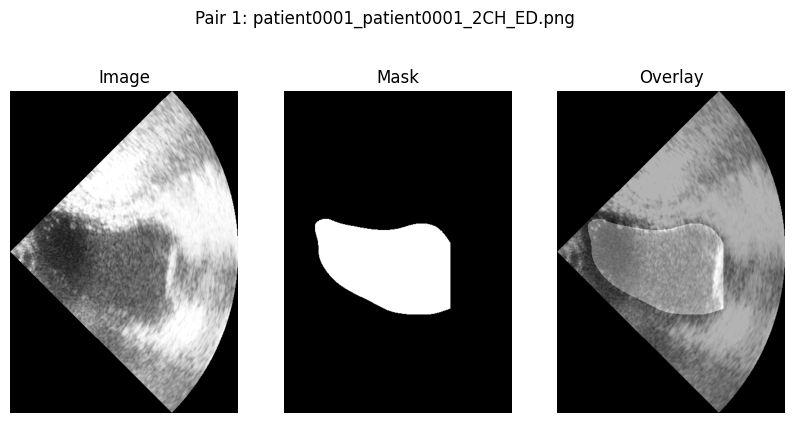

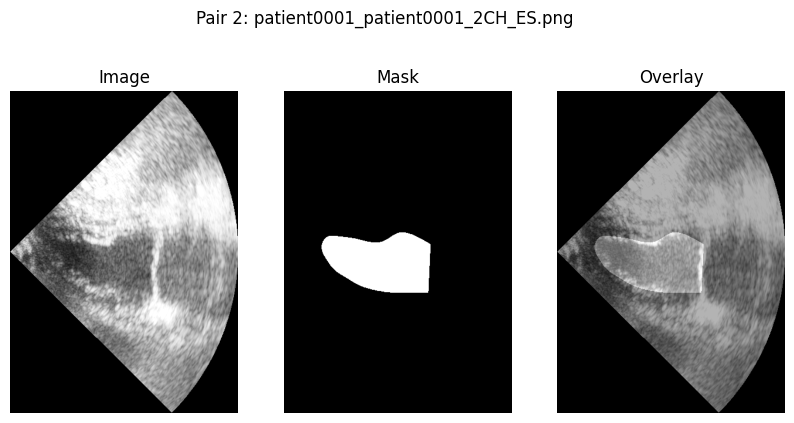

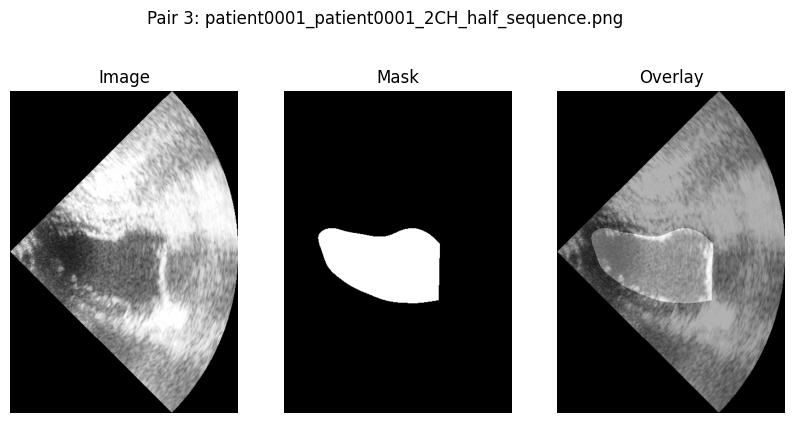

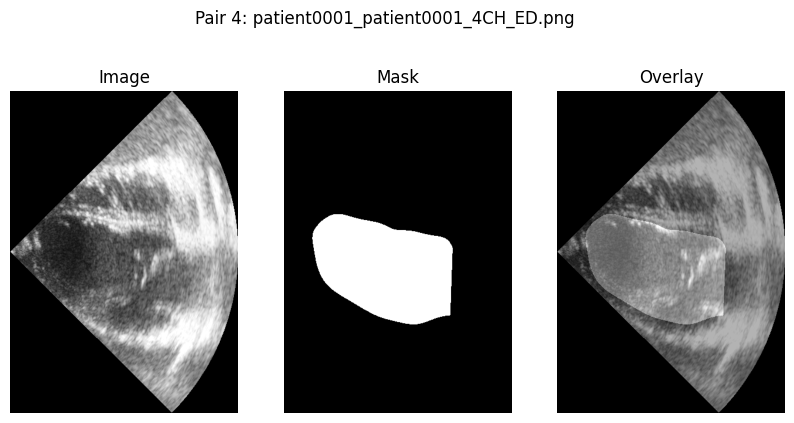

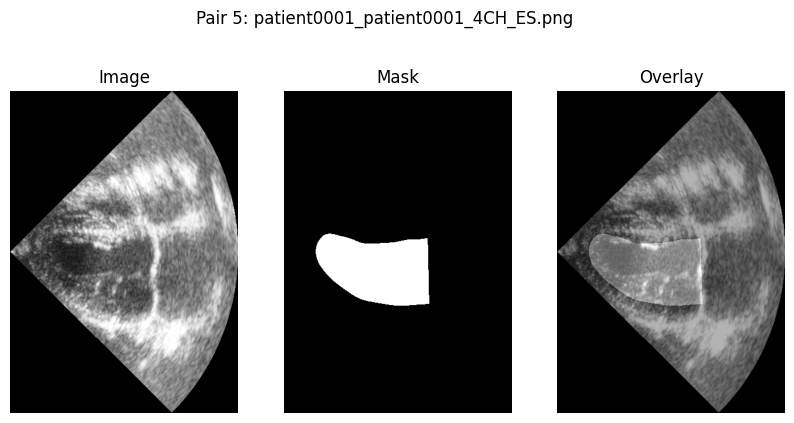

In [3]:
import os
import cv2
import matplotlib.pyplot as plt

def visualize_image_mask_pairs(images_folder, masks_folder, num_samples=5):
    """
    Visualizes random pairs of images and their corresponding masks to check alignment.

    Parameters:
    - images_folder: Folder containing the images.
    - masks_folder: Folder containing the masks.
    - num_samples: Number of random samples to visualize.
    """
    image_files = sorted(os.listdir(images_folder))
    mask_files = sorted(os.listdir(masks_folder))

    if len(image_files) != len(mask_files):
        print(f"Warning: Number of images ({len(image_files)}) and masks ({len(mask_files)}) do not match.")

    for i in range(min(num_samples, len(image_files))):
        img_file = image_files[i]
        mask_file = mask_files[i]

        # Ensure filenames are aligned (they should be, but it's good to double-check)
        if not mask_file.startswith(img_file.split(".png")[0]):
            print(f"Mismatch: {img_file} does not match {mask_file}")
            continue

        # Load image and mask
        img_path = os.path.join(images_folder, img_file)
        mask_path = os.path.join(masks_folder, mask_file)

        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        if img is None or mask is None:
            print(f"Error loading image or mask: {img_file}, {mask_file}")
            continue

        # Overlay the mask on the image for visualization
        overlay = cv2.addWeighted(img, 0.7, mask, 0.3, 0)

        # Plot the image, mask, and overlay
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 3, 1)
        plt.title("Image")
        plt.imshow(img, cmap="gray")
        plt.axis("off")

        plt.subplot(1, 3, 2)
        plt.title("Mask")
        plt.imshow(mask, cmap="gray")
        plt.axis("off")

        plt.subplot(1, 3, 3)
        plt.title("Overlay")
        plt.imshow(overlay, cmap="gray")
        plt.axis("off")

        plt.suptitle(f"Pair {i + 1}: {img_file}")
        plt.show()

# Example usage
images_folder = "/Users/naomimalange/Desktop/M1/AI Lab/Ongoing projects/DCM/all flatten_images"
masks_folder = "/Users/naomimalange/Desktop/M1/AI Lab/Ongoing projects/DCM/all_flatten_masks"
visualize_image_mask_pairs(images_folder, masks_folder, num_samples=5)


## visualize the image size and channel and resizing the size

In [7]:
import os
import cv2
import matplotlib.pyplot as plt

def resize_images_and_masks(images_folder, masks_folder, output_images_folder, output_masks_folder, target_size=(256, 256)):
    """
    Resizes images and masks to a fixed size of (256, 256) for masks and (256, 256, 3) for images.
    Saves the resized images and masks into separate folders.

    Parameters:
    - images_folder: Folder containing the original images.
    - masks_folder: Folder containing the original masks.
    - output_images_folder: Folder to save the resized images.
    - output_masks_folder: Folder to save the resized masks.
    - target_size: Tuple (height, width) to resize both images and masks.
    """
    # Create output directories if they don't exist
    os.makedirs(output_images_folder, exist_ok=True)
    os.makedirs(output_masks_folder, exist_ok=True)

    print("Resizing and saving images and masks...")

    # Loop through the images and resize
    for img_file in sorted(os.listdir(images_folder)):
        img_path = os.path.join(images_folder, img_file)
        img = cv2.imread(img_path)
        if img is not None:
            resized_img = cv2.resize(img, target_size)
            # Resize to (256, 256, 3) for images
            resized_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)  # Ensure RGB format
            output_img_path = os.path.join(output_images_folder, img_file)
            cv2.imwrite(output_img_path, resized_img)
        else:
            print(f"Error reading image: {img_file}")

    # Loop through the masks and resize
    for mask_file in sorted(os.listdir(masks_folder)):
        mask_path = os.path.join(masks_folder, mask_file)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        if mask is not None:
            resized_mask = cv2.resize(mask, target_size)
            # Resize to (256, 256) for masks (grayscale)
            output_mask_path = os.path.join(output_masks_folder, mask_file)
            cv2.imwrite(output_mask_path, resized_mask)
        else:
            print(f"Error reading mask: {mask_file}")

    print("Resizing completed.")

# Example usage
images_folder = "/Users/naomimalange/Desktop/M1/AI Lab/Ongoing projects/DCM/all flatten_images"
masks_folder = "/Users/naomimalange/Desktop/M1/AI Lab/Ongoing projects/DCM/all_flatten_masks"
output_images_folder = "/Users/naomimalange/Desktop/M1/AI Lab/Ongoing projects/DCM/resized_images"
output_masks_folder = "/Users/naomimalange/Desktop/M1/AI Lab/Ongoing projects/DCM/resized_masks"
resize_images_and_masks(images_folder, masks_folder, output_images_folder, output_masks_folder)


Resizing and saving images and masks...
Resizing completed.
